In [1]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
two_composite_filtered = pd.read_csv("../Curated_data/two_composite_filtered.csv", low_memory=False)


In [3]:
# Assuming you have a DataFrame named two_composite_filtered

variable = 'Density_gcm3'
covariates = ['Sulph1_Code', 'Sulph1_Pct', 'Sulph2_Code', 'Sulph2_Pct']
hole = 'KV139'

selected_columns = ["Name", 'X', 'Y', 'Z', variable] + covariates
two_composite_1covariates = two_composite_filtered[selected_columns]

# Now, result_df contains the specified columns


In [4]:

two_composite_1covariates = two_composite_1covariates.dropna(subset=[variable] + covariates)
two_composite_1covariates_1hole = two_composite_1covariates.loc[two_composite_1covariates['Name'] == hole]


In [5]:
two_composite_1covariates_1hole

,Name,X,Y,Z,Density_gcm3,Sulph1_Code,Sulph1_Pct,Sulph2_Code,Sulph2_Pct
11499,KV139,3498896.02,7512447.42,216.26,2.95,PO,1.00,CP,1.0
11500,KV139,3498896.69,7512447.35,214.38,3.01,PO,1.10,CP,1.0
11501,KV139,3498897.35,7512447.27,212.49,3.21,PO,2.85,CP,1.0
11502,KV139,3498898.02,7512447.20,210.61,3.23,PO,3.60,CP,1.8
11503,KV139,3498898.69,7512447.12,208.73,3.24,PO,4.00,CP,2.0
...,...,...,...,...,...,...,...,...,...
12055,KV139,3499181.48,7512399.35,-855.57,2.94,PO,0.20,CP,0.1
12056,KV139,3499181.95,7512399.24,-857.51,2.89,PO,0.20,CP,0.1
12064,KV139,3499185.64,7512398.31,-873.05,2.72,PO,5.00,CP,0.4
12065,KV139,3499186.10,7512398.19,-875.00,2.69,PO,5.00,CP,0.4


In [6]:

# Assuming 'data' is your DataFrame
# Create a copy of the original DataFrame to store the encoded data
encoded_data = two_composite_1covariates_1hole.copy()

# Define the threshold for one-hot encoding (e.g., 10 unique values)
threshold = 10

# Iterate through each column
for column in two_composite_1covariates_1hole.columns:
    # Check if the column is of object data type (categorical)
    if two_composite_1covariates_1hole[column].dtype == 'object':
        unique_values = two_composite_1covariates_1hole[column].nunique()
        
        # Check if the number of unique values is within the threshold
        if unique_values <= threshold:
            # Perform one-hot encoding for columns with unique values within the threshold
            encoded_columns = pd.get_dummies(encoded_data[column], prefix=column)
            encoded_columns = encoded_columns.astype(int)  # Convert to integers (0 or 1)
            encoded_data = pd.concat([encoded_data, encoded_columns], axis=1)
            encoded_data = encoded_data.drop(columns=[column])

# Now, 'encoded_data' contains the one-hot encoded columns within the specified threshold, with 0s and 1s.


In [7]:
encoded_data

,X,Y,Z,Density_gcm3,Sulph1_Pct,Sulph2_Pct,Name_KV139,Sulph1_Code_CP,Sulph1_Code_PO,Sulph2_Code_CP,Sulph2_Code_PO
11499,3498896.02,7512447.42,216.26,2.95,1.00,1.0,1,0,1,1,0
11500,3498896.69,7512447.35,214.38,3.01,1.10,1.0,1,0,1,1,0
11501,3498897.35,7512447.27,212.49,3.21,2.85,1.0,1,0,1,1,0
11502,3498898.02,7512447.20,210.61,3.23,3.60,1.8,1,0,1,1,0
11503,3498898.69,7512447.12,208.73,3.24,4.00,2.0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12055,3499181.48,7512399.35,-855.57,2.94,0.20,0.1,1,0,1,1,0
12056,3499181.95,7512399.24,-857.51,2.89,0.20,0.1,1,0,1,1,0
12064,3499185.64,7512398.31,-873.05,2.72,5.00,0.4,1,0,1,1,0
12065,3499186.10,7512398.19,-875.00,2.69,5.00,0.4,1,0,1,1,0


In [8]:
encoded_data['CP_Total'] = encoded_data['Sulph1_Code_CP']*encoded_data['Sulph1_Pct'] + encoded_data['Sulph2_Code_CP']*encoded_data['Sulph2_Pct']


In [9]:
encoded_data['PO_Total'] = encoded_data['Sulph1_Code_PO']*encoded_data['Sulph1_Pct'] + encoded_data['Sulph2_Code_PO']*encoded_data['Sulph2_Pct']

In [10]:
for col in encoded_data.columns:
    print(f'"{col}",', end=' ')


"X", "Y", "Z", "Density_gcm3", "Sulph1_Pct", "Sulph2_Pct", "Name_KV139", "Sulph1_Code_CP", "Sulph1_Code_PO", "Sulph2_Code_CP", "Sulph2_Code_PO", "CP_Total", "PO_Total", 

In [11]:
two_composite_1covariates_1hole = encoded_data[["X", "Y", "Z", "Density_gcm3", "CP_Total", "PO_Total"]]

In [12]:
covariates = [ "CP_Total", "PO_Total"]

In [15]:
two_composite_1covariates_1hole

,X,Y,Z,Density_gcm3,CP_Total,PO_Total
12066,3499186.56,7512398.08,0.000000,0.109375,0.112676,0.790323
12065,3499186.10,7512398.19,0.001775,0.000000,0.112676,0.790323
12064,3499185.64,7512398.31,0.003558,0.046875,0.112676,0.790323
12056,3499181.95,7512399.24,0.017774,0.312500,0.028169,0.016129
12055,3499181.48,7512399.35,0.019548,0.390625,0.028169,0.016129
...,...,...,...,...,...,...
11503,3498898.69,7512447.12,0.993112,0.859375,0.563380,0.629032
11502,3498898.02,7512447.20,0.994832,0.843750,0.507042,0.564516
11501,3498897.35,7512447.27,0.996551,0.812500,0.281690,0.443548
11500,3498896.69,7512447.35,0.998280,0.500000,0.281690,0.161290


C:\Users\23478671\AppData\Local\Temp\ipykernel_32\4026720804.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\23478671\AppData\Local\Temp\ipykernel_32\4026720804.py:41: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\23478671\AppData\Local\Temp\ipykernel_32\4026720804.py:42: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



- Iteration 0, MSE: 0.591
- Iteration 1000, MSE: 0.014
- Iteration 2000, MSE: 0.013
- Iteration 3000, MSE: 0.011
- Iteration 4000, MSE: 0.010
- Iteration 5000, MSE: 0.009
- Iteration 6000, MSE: 0.009


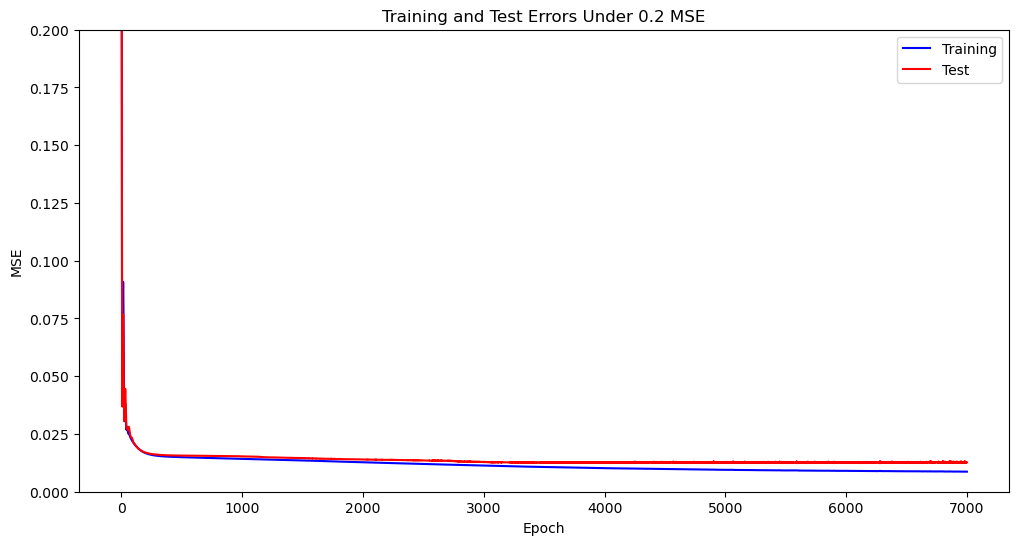

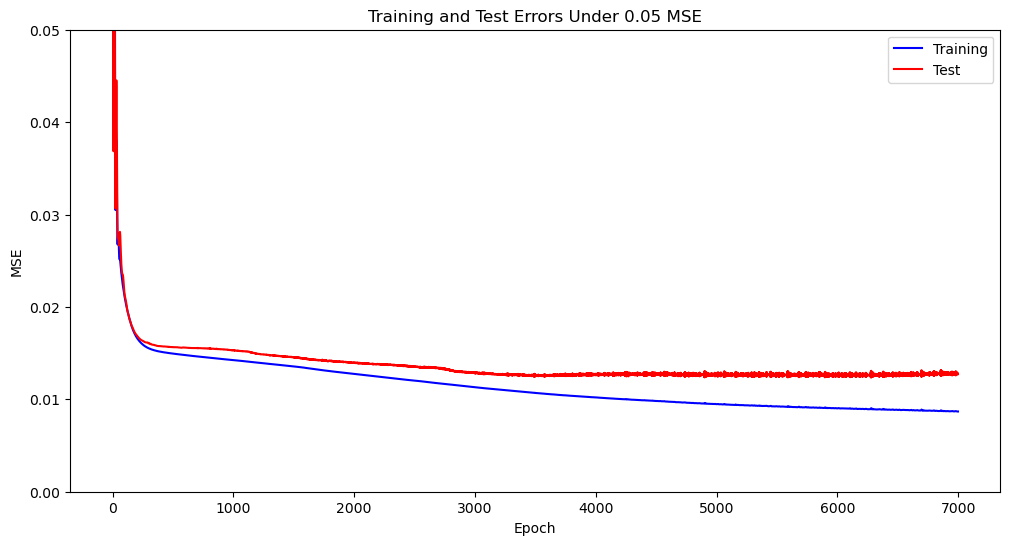

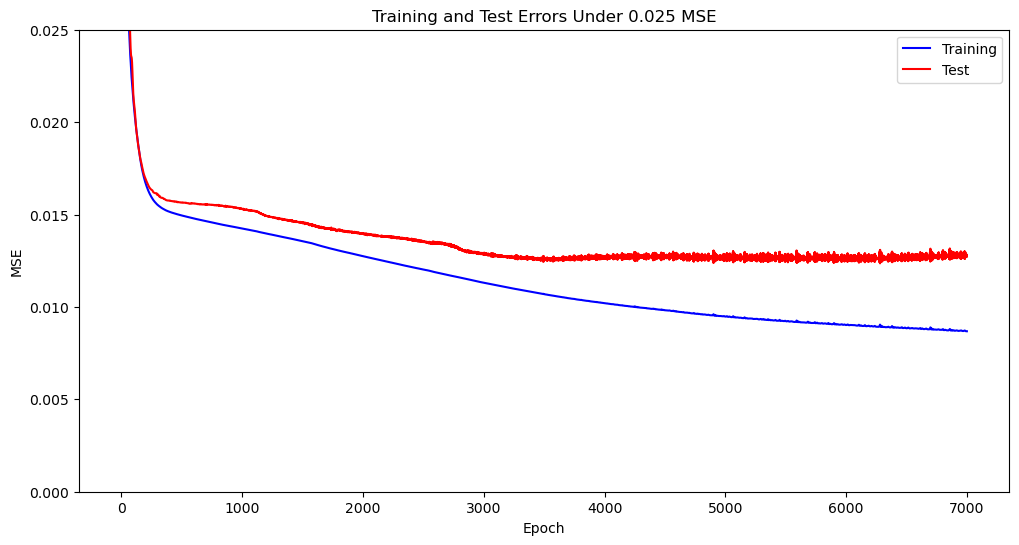

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


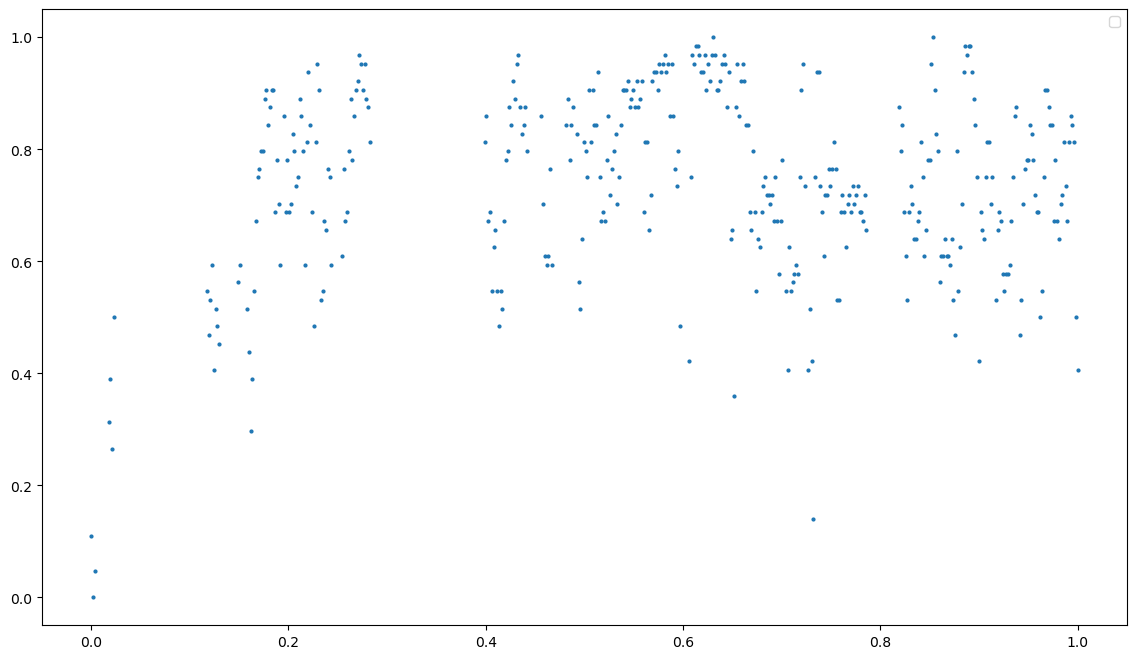

Text(0.5, 1.0, 'Density_gcm3')

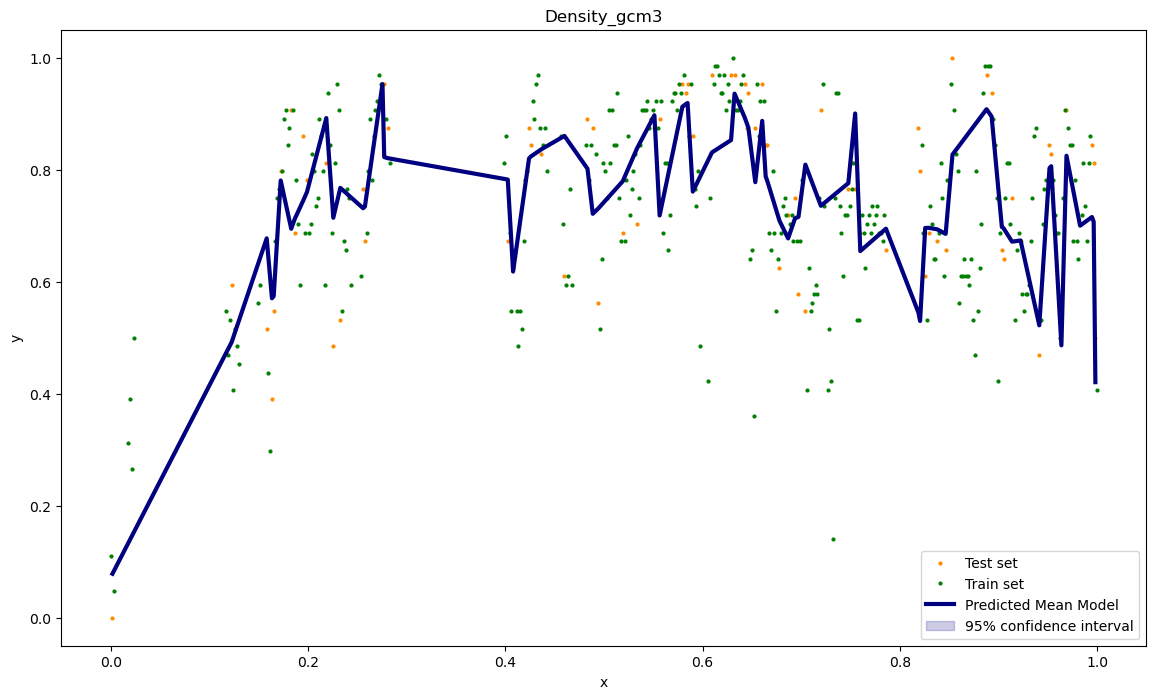

In [13]:
np.random.seed(42)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the specified columns
two_composite_1covariates_1hole[['Z', variable] + covariates] = scaler.fit_transform(two_composite_1covariates_1hole[['Z',variable] + covariates])



two_composite_1covariates_1hole=two_composite_1covariates_1hole.sort_values(by='Z')

x = two_composite_1covariates_1hole[['X','Y', 'Z'] + covariates].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
y = two_composite_1covariates_1hole[[variable]].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
x = x.reshape(len(two_composite_1covariates_1hole),5)
x = x[:,[2,3,4]]

x = torch.tensor(x)
y = torch.tensor(y)
x = x.to(torch.float32)
y = y.to(torch.float32)

# Determine the size of the test set (e.g., 20% of the data)
test_size = int(0.2 * len(x))

# Generate random indices for the test set
test_indices = np.random.choice(len(x), size=test_size, replace=False)

# Create train and test sets based on the indices
x_train = x[np.setdiff1d(np.arange(len(x)), test_indices)]
y_train = y[np.setdiff1d(np.arange(len(y)), test_indices)]

x_test = x[np.sort(test_indices)]
y_test = y[np.sort(test_indices)]



import matplotlib.pyplot as plt

# Create train and test sets
x = torch.tensor(x)
y = torch.tensor(y)
x = x.to(torch.float32)
y = y.to(torch.float32)

# Split the data into train and test sets
test_size = int(0.2 * len(x))
test_indices = np.random.choice(len(x), size=test_size, replace=False)
x_train = x[np.setdiff1d(np.arange(len(x)), test_indices)]
y_train = y[np.setdiff1d(np.arange(len(y)), test_indices)]
x_test = x[np.sort(test_indices)]
y_test = y[np.sort(test_indices)]

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model = nn.Sequential(
    nn.Linear(in_features=3, out_features=500),
    nn.ReLU(),
    nn.Linear(in_features=500, out_features=1)
)

mse_loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []  # To store training losses during training
test_losses = []   # To store test losses during training

for step in range(7000):
    pre = model(x_train)
    mse = mse_loss(pre, y_train)
    cost = mse

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    pre_train = model(x_train)
    mse_train = mse_loss(pre_train, y_train)
    train_losses.append(mse_train.item())

    # Evaluate the model on the test set
    pre_test = model(x_test)
    mse_test = mse_loss(pre_test, y_test)
    test_losses.append(mse_test.item())

    if step % 1000 == 0:
        print(f'- Iteration {step}, MSE: {mse.item():.3f}')


# Create a plot showing only values under 0.2 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.2)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.2 MSE')
plt.show()



# Create a plot showing only values under 0.05 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.05)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.05 MSE')
plt.show()

# Create a plot showing only values under 0.05 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.025)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.025 MSE')
plt.show()








models_result = np.array([model(x_test).detach().numpy() for k in range(1)])

models_result = models_result[:, :, 0]
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

plt.figure(figsize=(14,8))
plt.scatter(x.data.numpy()[:,0], y.data.numpy(), s=4)
plt.legend()
plt.show()

plt.figure(figsize=(14,8))
plt.plot(x_test.data.numpy()[:,0],y_test.data.numpy()[:,0],'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_train.data.numpy()[:,0],y_train.data.numpy()[:,0],'.',color='green',markersize=4,label='Train set')



plt.plot(x_test.data.numpy()[:, 0],mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy()[:, 0],mean_values-2.0*std_values,mean_values+2.0*std_values,alpha=0.2,color='navy',label='95% confidence interval')



#for x_val in x_test.data.numpy()[:, 0]:
#    plt.vlines(x_val, ymin=y_test.data.numpy()[:,0].min(), ymax=y_test.data.numpy()[:,0].max(), linestyle='--', color='black', alpha=0.1)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(variable)

In [117]:
two_composite_1covariates_1hole

,X,Y,Z,Density_gcm3,CP_Total,PO_Total
12066,3499186.56,7512398.08,0.000000,0.109375,0.112676,0.790323
12065,3499186.10,7512398.19,0.001775,0.000000,0.112676,0.790323
12064,3499185.64,7512398.31,0.003558,0.046875,0.112676,0.790323
12056,3499181.95,7512399.24,0.017774,0.312500,0.028169,0.016129
12055,3499181.48,7512399.35,0.019548,0.390625,0.028169,0.016129
...,...,...,...,...,...,...
11503,3498898.69,7512447.12,0.993112,0.859375,0.563380,0.629032
11502,3498898.02,7512447.20,0.994832,0.843750,0.507042,0.564516
11501,3498897.35,7512447.27,0.996551,0.812500,0.281690,0.443548
11500,3498896.69,7512447.35,0.998280,0.500000,0.281690,0.161290


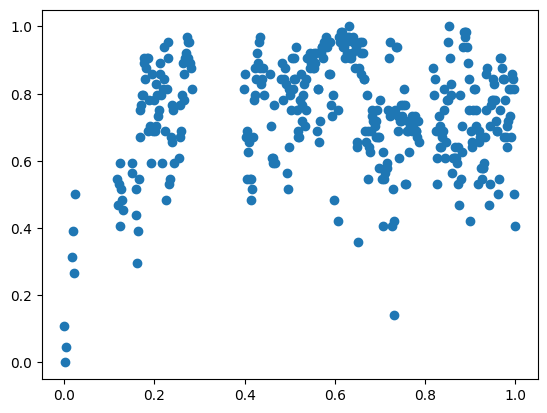

In [122]:
two_composite_1covariates_1hole[['Z','Density_gcm3']]

plt.scatter(two_composite_1covariates_1hole['Z'],two_composite_1covariates_1hole['Density_gcm3'])